<a href="https://colab.research.google.com/github/Maystrix/Topic-Modelling-on-News-Articles/blob/main/Capstone_IV_Topic_Modelling_on_BBC_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Topic Modelling on News Articles**



##### **Project Type**    - Unsupervised 
##### **Contribution**    - Individual


# **Project Summary -**

*The datset contained over 2225 documents, with different topics hidden inside them. The goal of topic modelling was to perform textual pre-processing and implemnt ML algorithms to correctly identify topics given in the documents. After reading all the lines and appending the text & topics in respective list, data was cleaned and visualized wrt length of document and word_count present in the documents.Further test pre-processing was done where-in all the irrelevant string data [ punctuations , non-words, stopwords, nuumbers etc] were removed and after performing vectorization using TF-IDF ( since, it takes into account not just the frequency of the words but also its importance to the document) final clean news was obtained which was used for model implementation. First, LDA was implemnted with considerable results , LSA gave not so satisfactory resluts using CountVectorization & also using TF-IDF . The best topic predictions was done by LDA using gensim library algorithm which correctly classified topics into 'Government, Politics, Sports, Technology, Entertainment' based on the importance of words for each document.*

# **GitHub Link -**

https://github.com/Maystrix/Topic-Modelling-on-News-Articles

# **Problem Statement**


**Business Context**

In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use Clustering algorithms such as Latent Dirihlet Allocation (LDA), Latent Semantic Analysis (LSA)

**Data Desccription**

The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics , sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modelling on this dataset. Verify whether these topics correspond to different tags available

# ***Let's Begin !***

## ***1. Know Your Data***

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [12]:
# Import Libraries
import numpy as np
import pandas as pd
from IPython.display import display  # interactive display
from tqdm import tqdm   #progress bar of execution
from collections import Counter  # when u want to iterate over something and keep a count of that
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import os                                                                        # for listing files in given directory

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

import spacy
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize, RegexpParser

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer     # to create a dict --> how many times which word has occured in the document
from textblob import TextBlob
import scipy.stats as stats

from wordcloud import WordCloud

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD              # Singular value decomposition
from sklearn.decomposition import LatentDirichletAllocation  
from sklearn.manifold import TSNE    # similar to PCA --> used for dimensionality reduction

import gensim
from gensim import corpora

import warnings                                                                  ## Ignore warnings
warnings. simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#output_notebook()

%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Installing packages

In [13]:
!pip install contractions                                                        # for removing contractions
!pip install pyLDAvis  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [14]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised Learning/Topic Modelling/bbc/'
folders = ["business", "entertainment", "politics", "sport", "tech"]

In [15]:
news = []                                                                        
topics = []

for i in folders:
  lst_file_names = os.listdir(path+i)                                            # list of file names present in directory bbc
  for txt_files in lst_file_names:
    txt_path = path + i+ '/'+ txt_files                                          # exact path of all text files
    with open(txt_path, 'rb') as f:                                              # open a binary file
      text = f.read()                                                            # read all lines
      news.append(text)                                                          # append text files 
      topics.append(i)                                                           # append topics 


In [16]:
# creating a dataframe of news & type
df = pd.DataFrame()
df['News_text'] = news
df['type'] = topics

### Dataset First View

In [17]:
# Dataset First Look
df.head()

,News_text,type
0,b'Yukos unit buyer faces loan claim\n\nThe own...,business
1,b'Ad sales boost Time Warner profit\n\nQuarter...,business
2,b'Dollar gains on Greenspan speech\n\nThe doll...,business
3,b'US trade gap hits record in 2004\n\nThe gap ...,business
4,b'High fuel prices hit BA\'s profits\n\nBritis...,business


In [18]:
df.tail()

,News_text,type
2220,b'BT program to beat dialler scams\n\nBT is in...,tech
2221,b'Bad e-mail habits sustains spam\n\nThe \'bad...,tech
2222,b'Microsoft plans \'safer ID\' system\n\nMicro...,tech
2223,b'Camera phones are \'must-haves\'\n\nFour tim...,tech
2224,b'Beckham virus spotted on the net\n\nVirus wr...,tech


### Dataset Rows & Columns count

In [19]:
# Dataset Rows & Columns count
df.shape

(2225, 2)

### Dataset Information

In [20]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   News_text  2225 non-null   object
 1   type       2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


#### Duplicate Values

In [21]:
# Dataset Duplicate Value Count
df.duplicated().sum()

98

#### Missing Values/Null Values

In [22]:
# Missing Values/Null Values Count
df.isnull().sum()

News_text    0
type         0
dtype: int64

### What did you know about your dataset?

*Dataset contains over 2225 documents, with 98 duplicates and zero null values. The dataset [text] need text pre-processing for better model interpretability*

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
df.columns

Index(['News_text', 'type'], dtype='object')

In [24]:
# Dataset Describe
df.describe(include='all')

,News_text,type
count,2225,2225
unique,2127,5
top,b'Speak easy plan for media players\n\nMusic a...,sport
freq,2,511


## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
# finding length of each news
df['length'] = df['News_text'].apply(len)

In [26]:
# finding word countof each news
df['word_count'] = df['News_text'].apply(lambda x:len(str(x).split(" ")))

In [27]:
df.head()

,News_text,type,length,word_count
0,b'Yukos unit buyer faces loan claim\n\nThe own...,business,1552,261
1,b'Ad sales boost Time Warner profit\n\nQuarter...,business,2560,416
2,b'Dollar gains on Greenspan speech\n\nThe doll...,business,2252,381
3,b'US trade gap hits record in 2004\n\nThe gap ...,business,1954,324
4,b'High fuel prices hit BA\'s profits\n\nBritis...,business,2412,401


In [28]:
bbc_df = df.copy()

### What all manipulations have you done and insights you found?

*The length & word_count of each doc is calculated*

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [29]:
topic_count = bbc_df['type'].value_counts()
topic_count

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: type, dtype: int64

[]

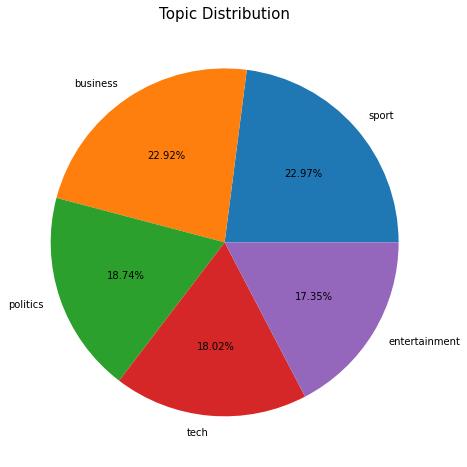

In [30]:
plt.figure(figsize = (10, 8))
plt.pie(topic_count , labels = topic_count.index, autopct = '%0.2f%%' )
plt.title("Topic Distribution", size=15)
plt.plot()

##### 1. Why did you pick the specific chart?

*Pie Chart describes distribution of multiple variables*

##### 2. What is/are the insight(s) found from the chart?

*Business and Sports are the most common topics present in the documents from the dataset*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*No*

#### Chart - 2

[]

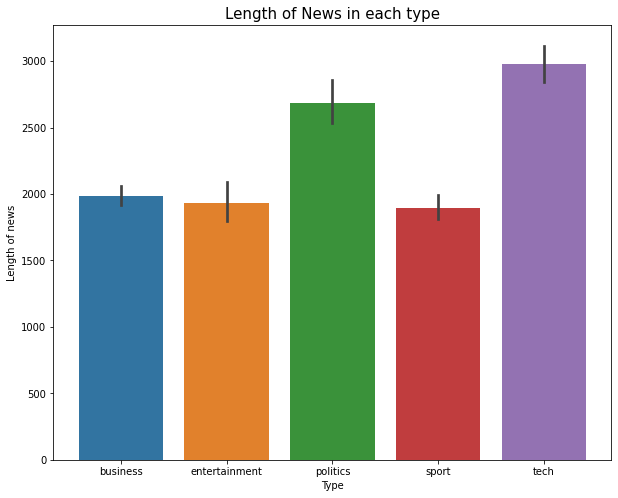

In [31]:
# length of news in each type
plt.figure(figsize = (10, 8))
sns.barplot(x= bbc_df['type'], y= bbc_df['length'])
plt.title('Length of News in each type', size=15)
plt.xlabel('Type')
plt.ylabel("Length of news")
plt.plot()

##### 1. Why did you pick the specific chart?

*To check the length of news of each topic*

##### 2. What is/are the insight(s) found from the chart?

*Tech & politics contain the maximum no of text / words of all the topics*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*Length of news is not related to topic distribution*

#### Chart - 3

[]

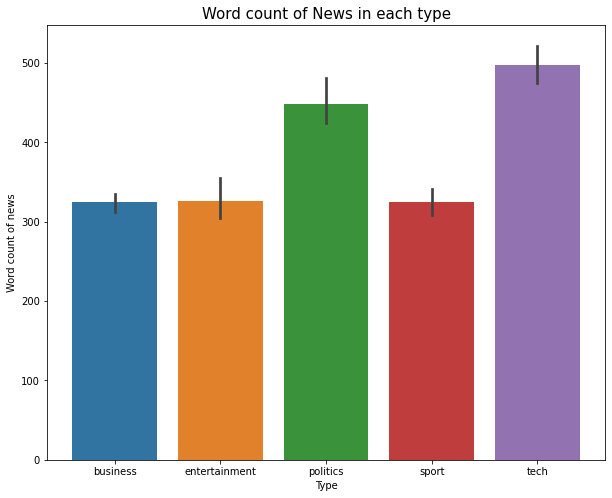

In [32]:
# length of news in each type
plt.figure(figsize = (10, 8))
sns.barplot(x= bbc_df['type'], y= bbc_df['word_count'])
plt.title('Word count of News in each type', size=15)
plt.xlabel('Type')
plt.ylabel("Word count of news")
plt.plot()

##### 1. Why did you pick the specific chart?

*to Check no of words in each topic*

##### 2. What is/are the insight(s) found from the chart?

*Same as length , which was obivious*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart-4

In [33]:
bbc1_business = df[df['type'] == 'business']
bbc1_entertainment = df[df['type'] == 'entertainment']
bbc1_politics = df[df['type'] == 'politics']
bbc1_sport = df[df['type'] == 'sport']
bbc1_tech = df[df['type'] == 'tech']

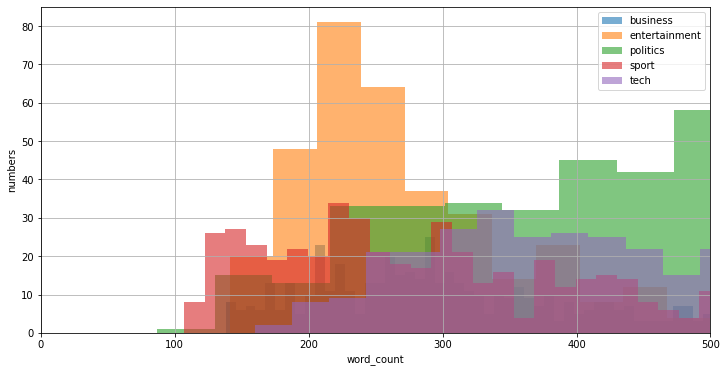

In [34]:
# topic distribution based on length
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc1_business['word_count'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc1_entertainment['word_count'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc1_politics['word_count'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc1_sport['word_count'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc1_tech['word_count'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('word_count')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,500)
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

*to check relation between topic and word_lentgh*

##### 2. What is/are the insight(s) found from the chart?

*Lentgh of words are too dense between 200-400 to distinguish between topic and word_length*

## ***5. Hypothesis Testing***

Not needed

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# dropping duplicate values
bbc_df.drop_duplicates(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

*Duplicates values were droped*

### 2. Textual Data Preprocessing 


#### 1. Expand Contraction

In [36]:
# Expand Contraction
bbc_df['News_text'][2]

b'Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditions 

#### 2. Lower Casing

In [37]:
# Lower Casing
bbc_df['News_text']= bbc_df['News_text'].apply(lambda x: x.lower())

In [38]:
# Converting column into astring
bbc_df['News_text'] = bbc_df['News_text'].astype('str') 

#### 3. Removing URLs & Removing non-words

* HTML tags

In [39]:
# removing HTML tags
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re                                                                    # regular expression module
    clean = re.compile('<.*?>')                                                  # removes anything in < >
    return re.sub(clean, '', text)

In [40]:
bbc_df['News_text'] = bbc_df['News_text'].apply(remove_html_tags)

* URLs

In [41]:
# removing url's
def remove_urls(text):
  """ Remove url tags from a string """
  url_pattern = r"https?://+|www\."                       # \S+ --> matches anything non-white space character with repetations ; ? --> matches 0 or 1 occurences of pattern to  its left 
  without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
  return without_urls

In [42]:
bbc_df['News_text'] = bbc_df['News_text'].apply(remove_urls)

In [43]:
bbc_df['News_text'][2]

'b\'dollar gains on greenspan speech\\n\\nthe dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.\\n\\nand alan greenspan highlighted the us government\\\'s willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan\\\'s speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman\\\'s taking a much more sanguine view on the current account deficit than he\\\'s taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he\\\'s taking a longer-term view, laying out a se

* non-words

In [44]:
# removing non-word 
def rem_non_word(text):
  """ Remove non-word characters from the string """
  non_words = r"\s+[a-zA-Z]'\s+"                                               # \s+ --> matches space character with repetation(+) ; [a-zA-Z] --> match text string within range
  without_nw = re.sub(pattern = non_words , repl = '', string =text)
  return without_nw

In [45]:
bbc_df['News_text'] = bbc_df['News_text'].apply(rem_non_word)

In [46]:
bbc_df['News_text'] = [re.sub(r"\\n+", " ", i) for i in bbc_df['News_text']]

In [47]:
bbc_df['News_text'][2]

'b\'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.  and alan greenspan highlighted the us government\\\'s willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan\\\'s speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman\\\'s taking a much more sanguine view on the current account deficit than he\\\'s taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he\\\'s taking a longer-term view, laying out a set of con

In [48]:
bbc_df['News_text'] = [re.sub(r"b\'+", "", i) for i in bbc_df['News_text']]

In [49]:
bbc_df['News_text'] = [re.sub(r"\\\'s+", "", i) for i in bbc_df['News_text']]

In [50]:
bbc_df['News_text'][2]

'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.  and alan greenspan highlighted the us government willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he taking a longer-term view, laying out a set of conditions under which the curr

#### 4. Removing Punctuations & digits

* Punctuations

In [51]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
def remove_punctuation(text):
  """ Removes punctuations mentioned in the library """
  punctuation_free = "".join([i for i in text if i not in string.punctuation])    # joins everything except punctuations
  return punctuation_free

In [53]:
bbc_df['News_text'] = bbc_df['News_text'].apply(lambda x:remove_punctuation(x))

In [54]:
bbc_df['News_text'][2]

'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise  and alan greenspan highlighted the us government willingness to curb spending and rising household savings as factors which may help to reduce it in late trading in new york the dollar reached 12871 against the euro from 12974 on thursday market concerns about the deficit has hit the greenback in recent months on friday federal reserve chairman mr greenspan speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worsethanexpected us jobs data i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time said robert sinche head of currency strategy at bank of america in new york he taking a longerterm view laying out a set of conditions under which the current account deficit ca

* Digits [Numbers]

In [55]:
def remove_numbers(text):
  num_to_remove = r'\d+'                                                               # \d+ --> matches digits 0-9 with any repetation
  without_num = re.sub(pattern = num_to_remove , repl ="", string=text)
  return without_num

In [56]:
bbc_df['News_text'] = bbc_df['News_text'].apply(remove_numbers)

In [57]:
bbc_df['News_text'][2]

'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise  and alan greenspan highlighted the us government willingness to curb spending and rising household savings as factors which may help to reduce it in late trading in new york the dollar reached  against the euro from  on thursday market concerns about the deficit has hit the greenback in recent months on friday federal reserve chairman mr greenspan speech in london ahead of the meeting of g finance ministers sent the dollar higher after it had earlier tumbled on the back of worsethanexpected us jobs data i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time said robert sinche head of currency strategy at bank of america in new york he taking a longerterm view laying out a set of conditions under which the current account deficit can improve t

#### 5. Removing Stopwords 

In [58]:
# Remove Stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [59]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [60]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [61]:
bbc_df['News_wo_stopwords'] = bbc_df['News_text'].apply(stopwords)

In [62]:
bbc_df['News_text'][2]

'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise  and alan greenspan highlighted the us government willingness to curb spending and rising household savings as factors which may help to reduce it in late trading in new york the dollar reached  against the euro from  on thursday market concerns about the deficit has hit the greenback in recent months on friday federal reserve chairman mr greenspan speech in london ahead of the meeting of g finance ministers sent the dollar higher after it had earlier tumbled on the back of worsethanexpected us jobs data i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time said robert sinche head of currency strategy at bank of america in new york he taking a longerterm view laying out a set of conditions under which the current account deficit can improve t

In [63]:
bbc_df.head()

,News_text,type,length,word_count,News_wo_stopwords
0,yukos unit buyer faces loan claim the owners ...,business,1552,261,yukos unit buyer faces loan claim owners embat...
1,ad sales boost time warner profit quarterly p...,business,2560,416,ad sales boost time warner profit quarterly pr...
2,dollar gains on greenspan speech the dollar h...,business,2252,381,dollar gains greenspan speech dollar hit highe...
3,us trade gap hits record in the gap between ...,business,1954,324,us trade gap hits record gap us exports import...
4,high fuel prices hit ba profits british airwa...,business,2412,401,high fuel prices hit ba profits british airway...


#### 6. Tokenization

In [64]:
#Tokenization using Regular expression (RegEx)
def tokenization(text):
    tokens = re.split('\W+',text)                                                 # \W --> represents any word character (alphanumeric)
    return tokens                                                                 # finds all alphanumeric character until any other character is encountered  

In [65]:
bbc_df['tokens'] = bbc_df['News_text'].apply(tokenization)

In [66]:
bbc_df.head()

,News_text,type,length,word_count,News_wo_stopwords,tokens
0,yukos unit buyer faces loan claim the owners ...,business,1552,261,yukos unit buyer faces loan claim owners embat...,"[yukos, unit, buyer, faces, loan, claim, the, ..."
1,ad sales boost time warner profit quarterly p...,business,2560,416,ad sales boost time warner profit quarterly pr...,"[ad, sales, boost, time, warner, profit, quart..."
2,dollar gains on greenspan speech the dollar h...,business,2252,381,dollar gains greenspan speech dollar hit highe...,"[dollar, gains, on, greenspan, speech, the, do..."
3,us trade gap hits record in the gap between ...,business,1954,324,us trade gap hits record gap us exports import...,"[us, trade, gap, hits, record, in, the, gap, b..."
4,high fuel prices hit ba profits british airwa...,business,2412,401,high fuel prices hit ba profits british airway...,"[high, fuel, prices, hit, ba, profits, british..."


#### 7. Text Normalization

In [67]:
#defining the object for Lemmatization
lmt = WordNetLemmatizer()

In [68]:
#defining the function for lemmatization
def lemmatizer(text):
  """ This function lematizes each word in the text """
  lemat_text = [lmt.lemmatize(word) for word in text.split()]
  return lemat_text

In [69]:
bbc_df['lematized_news'] = bbc_df['News_text'].apply(lambda x:lemmatizer(x))

In [70]:
bbc_df.head()

,News_text,type,length,word_count,News_wo_stopwords,tokens,lematized_news
0,yukos unit buyer faces loan claim the owners ...,business,1552,261,yukos unit buyer faces loan claim owners embat...,"[yukos, unit, buyer, faces, loan, claim, the, ...","[yukos, unit, buyer, face, loan, claim, the, o..."
1,ad sales boost time warner profit quarterly p...,business,2560,416,ad sales boost time warner profit quarterly pr...,"[ad, sales, boost, time, warner, profit, quart...","[ad, sale, boost, time, warner, profit, quarte..."
2,dollar gains on greenspan speech the dollar h...,business,2252,381,dollar gains greenspan speech dollar hit highe...,"[dollar, gains, on, greenspan, speech, the, do...","[dollar, gain, on, greenspan, speech, the, dol..."
3,us trade gap hits record in the gap between ...,business,1954,324,us trade gap hits record gap us exports import...,"[us, trade, gap, hits, record, in, the, gap, b...","[u, trade, gap, hit, record, in, the, gap, bet..."
4,high fuel prices hit ba profits british airwa...,business,2412,401,high fuel prices hit ba profits british airway...,"[high, fuel, prices, hit, ba, profits, british...","[high, fuel, price, hit, ba, profit, british, ..."


* Clean News

In [71]:
bbc_df['clean_news'] = [' '.join(text) for text in bbc_df['lematized_news']] 

In [72]:
bbc_df['clean_news'][2]

'dollar gain on greenspan speech the dollar ha hit it highest level against the euro in almost three month after the federal reserve head said the u trade deficit is set to stabilise and alan greenspan highlighted the u government willingness to curb spending and rising household saving a factor which may help to reduce it in late trading in new york the dollar reached against the euro from on thursday market concern about the deficit ha hit the greenback in recent month on friday federal reserve chairman mr greenspan speech in london ahead of the meeting of g finance minister sent the dollar higher after it had earlier tumbled on the back of worsethanexpected u job data i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time said robert sinche head of currency strategy at bank of america in new york he taking a longerterm view laying out a set of condition under which the current account deficit can improve this year and next wo

##### Which text normalization technique have you used and why?

*Word-Net Lemmatization technique was used for normalization, since it considers the meaning & context of the words and connects it to root word* 

#### 9. Part of speech tagging

In [73]:
# using spacy library

def pos_tagging(text):
  allowed_postags = ['NOUN', 'ADJ']
  tag_txt = []
  doc = nlp(text)
  tag_txt.append([token.text for token in doc if token.pos_ in allowed_postags])   
  return ' '.join(tag_txt[0])


In [74]:
nlp = spacy.load("en_core_web_sm" ,disable=['parser', 'ner'])
bbc_df['news'] = bbc_df['clean_news'].apply(lambda x:pos_tagging(x))

In [75]:
bbc_df.head()

,News_text,type,length,word_count,News_wo_stopwords,tokens,lematized_news,clean_news,news
0,yukos unit buyer faces loan claim the owners ...,business,1552,261,yukos unit buyer faces loan claim owners embat...,"[yukos, unit, buyer, faces, loan, claim, the, ...","[yukos, unit, buyer, face, loan, claim, the, o...",yukos unit buyer face loan claim the owner of ...,unit buyer face loan claim owner russian oil g...
1,ad sales boost time warner profit quarterly p...,business,2560,416,ad sales boost time warner profit quarterly pr...,"[ad, sales, boost, time, warner, profit, quart...","[ad, sale, boost, time, warner, profit, quarte...",ad sale boost time warner profit quarterly pro...,ad sale boost time profit quarterly profit u m...
2,dollar gains on greenspan speech the dollar h...,business,2252,381,dollar gains greenspan speech dollar hit highe...,"[dollar, gains, on, greenspan, speech, the, do...","[dollar, gain, on, greenspan, speech, the, dol...",dollar gain on greenspan speech the dollar ha ...,dollar gain greenspan speech dollar highest le...
3,us trade gap hits record in the gap between ...,business,1954,324,us trade gap hits record gap us exports import...,"[us, trade, gap, hits, record, in, the, gap, b...","[u, trade, gap, hit, record, in, the, gap, bet...",u trade gap hit record in the gap between u ex...,u trade gap record gap export import alltime h...
4,high fuel prices hit ba profits british airwa...,business,2412,401,high fuel prices hit ba profits british airway...,"[high, fuel, prices, hit, ba, profits, british...","[high, fuel, price, hit, ba, profit, british, ...",high fuel price hit ba profit british airway h...,high fuel price profit british airway high fue...


In [76]:
bbc_df['news'][2]

'dollar gain greenspan speech dollar highest level euro month trade deficit government willingness spending household factor late trading dollar euro market concern deficit greenback recent month speech meeting finance dollar back worsethanexpected job data chairman sanguine view current account deficit time head currency strategy longerterm view set condition current account deficit year next worry deficit concern currency dollar currency sharp fall recent month chinese export price competitive shift policy deaf ear recent comment major chinese newspaper time ripe loosening peg meeting unlikely meaningful movement chinese policy meantime decision interest rate quarter point sixth such move many month differential european rate halfpoint window enough asset attractive dollar recent fall result big budget deficit u current account gap buying bond asset foreign firm government budget many commentator deficit close dollar'

#### 10. Top Words

In [77]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)        # .values --> creates a numpy array
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)           # index / position of each word in all documents
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)                # values of words at that position
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))         # n top words binary matrix for all the headlines
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for                           # n top words 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [78]:
count_vectorizer = CountVectorizer(stop_words='english')

In [79]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=bbc_df['news'])

In [80]:
words

['year',
 'people',
 'new',
 'game',
 'time',
 'government',
 'company',
 'world',
 'film',
 'firm',
 'best',
 'number',
 'country',
 'month',
 'way']

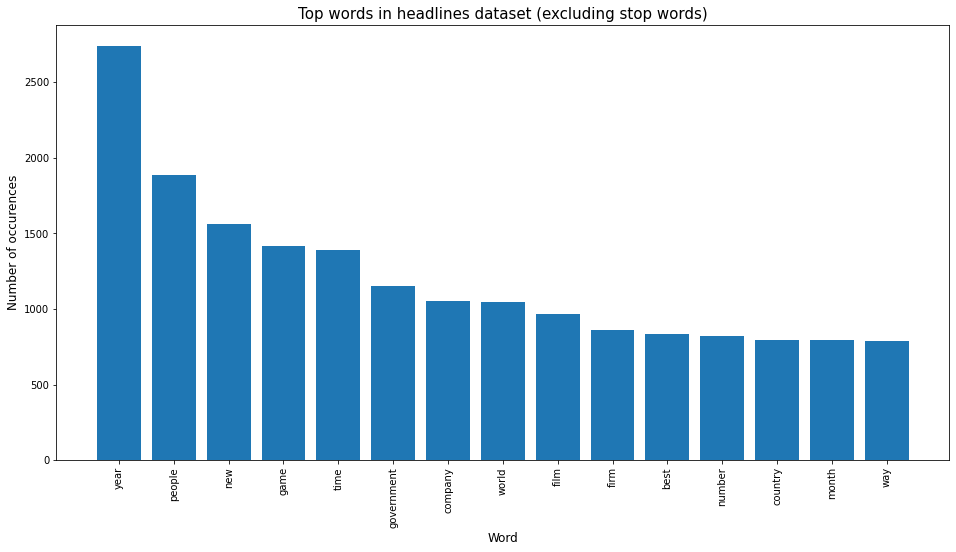

In [81]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=bbc_df['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)', size = 15)
ax.set_xlabel('Word', size =12 )
ax.set_ylabel('Number of occurences', size=12)
plt.show()

#### 11.  Word-Cloud

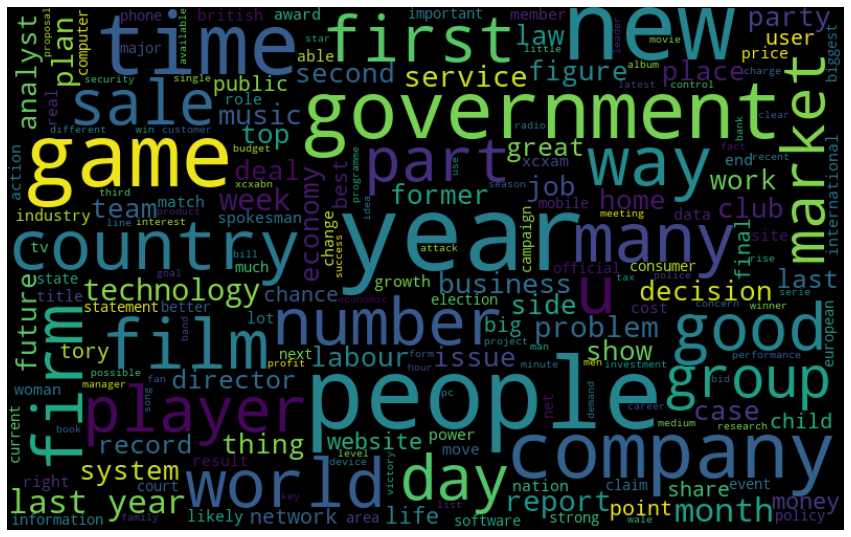

In [82]:
# Word cloud for all news articles 
plt.figure(figsize=(15,10))
cl_words = ' '.join(bbc_df['news'])
wordCloud = WordCloud(width=800, height=500, background_color="black", max_font_size=100).generate(cl_words)
plt.imshow(wordCloud, interpolation="bilinear", cmap = 'BuPu')
plt.axis('off')
plt.show()

In [83]:
bbc_df['type'].value_counts()

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: type, dtype: int64

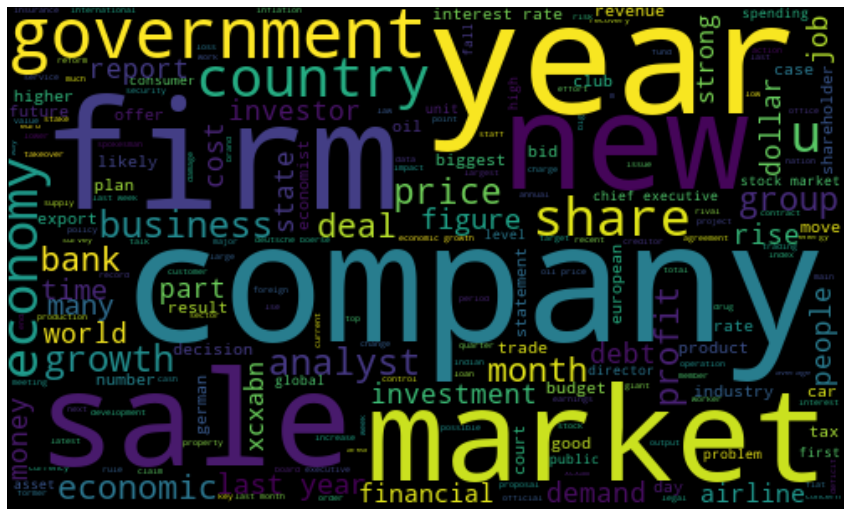

In [84]:
# for business 
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc_df[bbc_df['type']=='business']['news']])
wordCloud = WordCloud(width=500, height=300, background_color="black", random_state=21, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear", cmap = 'Greys')
plt.axis('off')
plt.show()

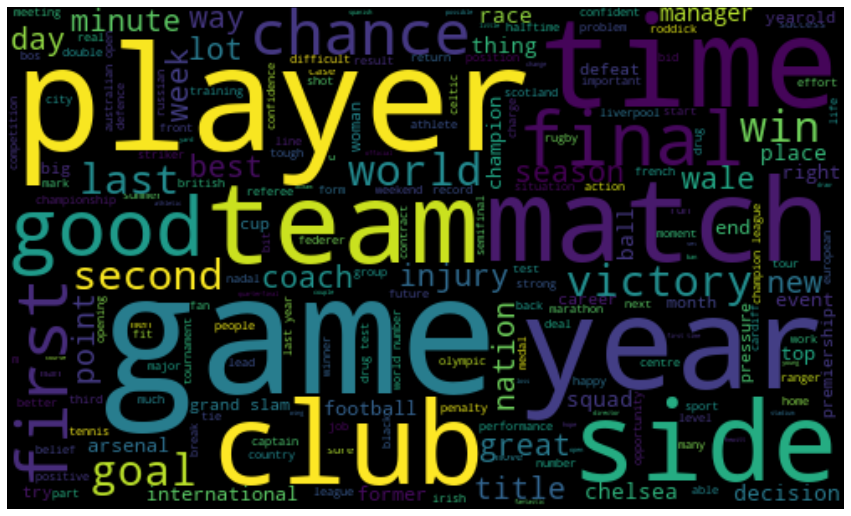

In [85]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc_df[bbc_df['type']=='sport']['news']])
wordCloud = WordCloud(width=500, height=300, background_color="black", random_state=21, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear", cmap = 'Greys')
plt.axis('off')
plt.show()

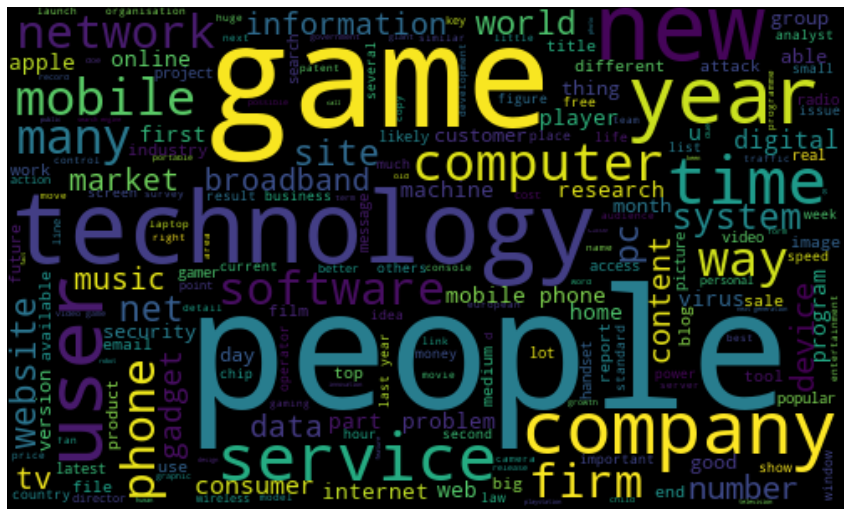

In [86]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc_df[bbc_df['type']=='tech']['news']])
wordCloud = WordCloud(width=500, height=300, background_color="black", random_state=21, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear", cmap = 'Greys')
plt.axis('off')
plt.show()

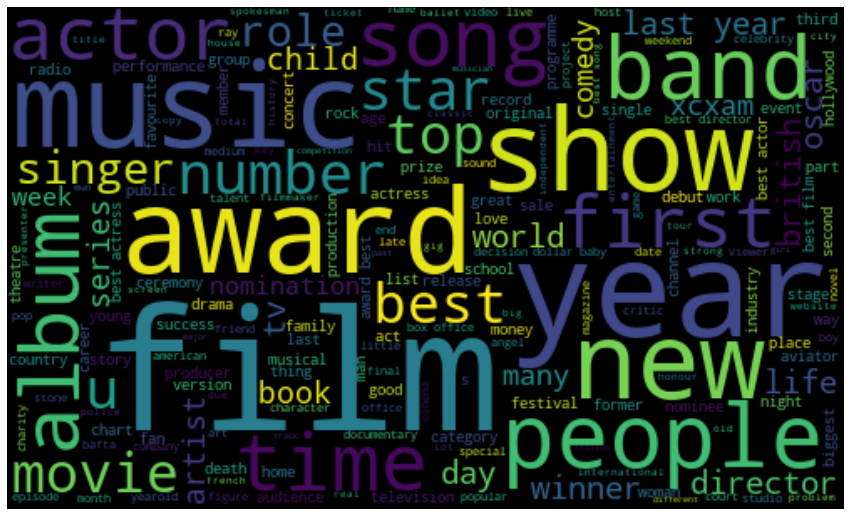

In [87]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc_df[bbc_df['type']=='entertainment']['news']])
wordCloud = WordCloud(width=500, height=300, background_color="black", random_state=21, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear", cmap = 'Greys')
plt.axis('off')
plt.show()

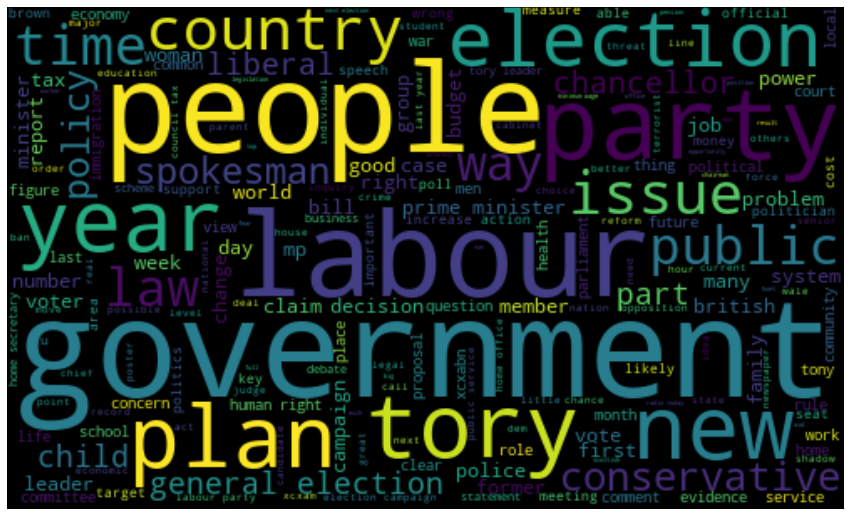

In [88]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc_df[bbc_df['type']=='politics']['news']])
wordCloud = WordCloud(width=500, height=300, background_color="black", random_state=21, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear", cmap = 'Greys')
plt.axis('off')
plt.show()

#### 12. Text Vectorization

In [89]:
vectorizer = TfidfVectorizer(max_df=0.8, max_features=8000,min_df=0.05)
tfidf_matrix = vectorizer.fit_transform(bbc_df['news'])
feature_names = vectorizer.get_feature_names()

In [90]:
print('Headline after vectorization : \n{}'.format(feature_names))

Headline after vectorization : 
['able', 'access', 'action', 'amount', 'analyst', 'annual', 'area', 'attack', 'attempt', 'available', 'award', 'bank', 'battle', 'belief', 'best', 'better', 'bid', 'big', 'biggest', 'bill', 'bit', 'body', 'british', 'business', 'campaign', 'career', 'case', 'centre', 'chairman', 'challenge', 'champion', 'chance', 'change', 'charge', 'chief', 'child', 'choice', 'city', 'claim', 'clear', 'club', 'coach', 'comment', 'common', 'company', 'competition', 'computer', 'concern', 'conservative', 'consumer', 'control', 'cost', 'country', 'course', 'court', 'current', 'customer', 'data', 'date', 'day', 'deal', 'decision', 'demand', 'development', 'different', 'difficult', 'digital', 'director', 'doe', 'dollar', 'due', 'early', 'economic', 'economy', 'effort', 'election', 'end', 'european', 'event', 'evidence', 'example', 'executive', 'fact', 'family', 'fan', 'few', 'figure', 'film', 'final', 'financial', 'firm', 'first', 'foreign', 'form', 'former', 'free', 'full',

##### Which text vectorization technique have you used and why?

*TF-IDF technique is used, because CountVectorizer only counts how many times a word appears in a document. But TF-IDF Vectorizer takes into account not only how many times a word apppears in a document but also, how important the word is to the whole corpus*

## ***6. Feature Manipulation & Selction***

not needed

#### 1. Data Scaling

No Need of scaling in NLP

#### 2. Dimensionality Reduction

Dataset has only 2 dimensions. Hence, not needed

#### 3. Handling Imbalanced Data

Data is Balanced

## ***7. ML Model Implementation***

 ### ML Model -1. Latent Dirichlet Allocation (LDA)  



In [91]:
# Parameter tuning 
from sklearn.model_selection import GridSearchCV 
grid_params = {'n_components':range(5, 10)}

In [92]:
# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(tfidf_matrix)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'n_components': range(5, 10)})

In [93]:
# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(tfidf_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -14401.242597800267
LDA model Perplexity on train data 490.1612212166722


In [94]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [95]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, tfidf_matrix ,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  28.823630
1       51.163364 -159.968018       2        1  24.418707
3      -73.144554   21.523815       3        1  22.261824
4      -66.410133 -110.606438       4        1  13.352715
0       54.417324   12.443444       5        1  11.143124, topic_info=           Term       Freq       Total Category  logprob  loglift
87         film  81.000000   81.000000  Default  30.0000  30.0000
44      company  78.000000   78.000000  Default  29.0000  29.0000
99         game  95.000000   95.000000  Default  28.0000  28.0000
90         firm  69.000000   69.000000  Default  27.0000  27.0000
108      growth  41.000000   41.000000  Default  26.0000  26.0000
..          ...        ...         ...      ...      ...      ...
171       month  14.676255   55.918375   Topic5  -4.2783   0.8567
52      country  14.432268   59.114706   Topic5  -4.2950   0.7843
326        year  23.003385  124.259455   Topic5  -3.8289   0.5076
105  government   8.597974   72.121805   Topic5  -4.8130   0.0675
172        more   8.337454   68.074554   Topic5  -4.8437   0.0945

[223 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4         1  0.141638  analyst
4         4  0.509897  analyst
4         5  0.339931  analyst
5         1  0.226788   annual
5         2  0.113394   annual
...     ...       ...      ...
326       4  0.160954     year
326       5  0.185097     year
327       1  0.250965  yearold
327       2  0.050193  yearold
327       3  0.652510  yearold

[616 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*LDA correctly describes the most of the topics we predicted --> 1.Politics ,   2. Business, 3. Sports, 4. entertainment, but incorrectly predicted tech topic*

### ML Model - 2. Latent Semantic Analysis (LSA)

*  Using Count vectorization

In [96]:
count_vectorizer = CountVectorizer(stop_words='english')                         # creating object instantation
count_data = count_vectorizer.fit_transform(bbc_df['news'])
feature_names = count_vectorizer.get_feature_names()
number_topics = 5
top_words = 20


In [153]:
# document clustering for LSA
tsvd = TruncatedSVD(n_components = 5)                                             # n_components --> no. of components required in the output
tsvd.fit(count_data)
tsvd_mat = tsvd.transform(count_data)

In [154]:
s_list =[]

for clus in tqdm(range(2, 21)):
  km = KMeans(n_clusters=clus, n_init=50, max_iter=1000)                         # Instantiate KMeans clustering
  km.fit(tsvd_mat)                                                               # Run KMeans clustering
  s = silhouette_score(tsvd_mat, km.labels_)
  s_list.append(s)

100%|██████████| 19/19 [01:24<00:00,  4.45s/it]


In [155]:
print(s)

0.27250067676393497


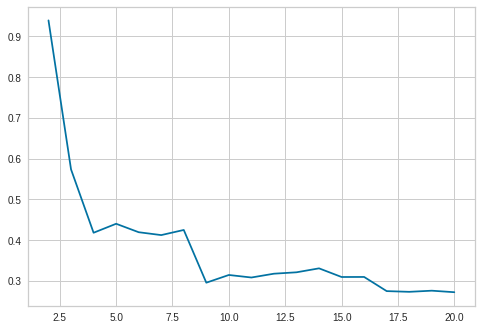

In [156]:
  # Silhouette Score
plt.plot(range(2,21), s_list)
plt.show()

*The plot cllearly showos that silhoutte scores are quite low, which indicates that either the clusters are not linearly separable or there is a considerable amount of overlap among them. For better understanding, TSNE plot can be used*

In [168]:
# TSNE plot
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

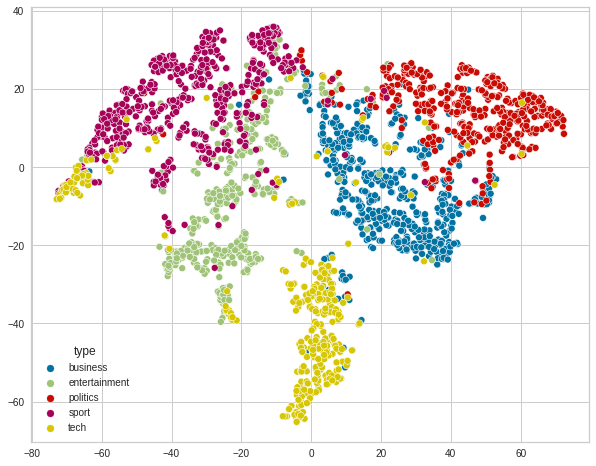

In [169]:
plt.figure(figsize=(10,8))
sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1],hue=bbc_df['type'])

*TSNE Plot shows that, 'Tech' related articles have a much wider spread whereas onther news articles are nicely clustered. But, it can be seen that while LSA has done a good job to segregate news articles into different topics ,some of the clusters are overlappinig*

In [170]:
def create_top_words_dict(model, features , n_top_words):                        # Defining function for top words
    """ This function gives top words."""
    top_words_dict = {}
    for topic_id, topic in enumerate(model.components_):
        top_words_dict[topic_id] = [features[i] for i in topic.argsort()[:-n_top_words - 1:-1]]        
    return top_words_dict

In [171]:
print("Top 20 words bagged by SVD model using CountVectorizer")

svd_top_words = create_top_words_dict(tsvd, feature_names , top_words)

print(svd_top_words)

Top 20 words bagged by SVD model using CountVectorizer
{0: ['year', 'people', 'game', 'new', 'music', 'time', 'government', 'best', 'song', 'world', 'way', 'company', 'good', 'service', 'mobile', 'phone', 'country', 'technology', 'number', 'film'], 1: ['best', 'song', 'music', 'award', 'year', 'angel', 'film', 'urban', 'british', 'artist', 'album', 'band', 'prize', 'pop', 'brit', 'winner', 'actor', 'category', 'act', 'stone'], 2: ['game', 'mobile', 'player', 'phone', 'time', 'technology', 'video', 'world', 'gaming', 'title', 'online', 'team', 'console', 'pc', 'tv', 'gadget', 'computer', 'gamers', 'point', 'hour'], 3: ['music', 'mobile', 'phone', 'people', 'technology', 'service', 'urban', 'network', 'user', 'digital', 'firm', 'net', 'camera', 'device', 'gadget', 'tv', 'consumer', 'company', 'data', 'pc'], 4: ['music', 'party', 'game', 'urban', 'labour', 'election', 'people', 'black', 'tory', 'government', 'campaign', 'term', 'issue', 'minister', 'leader', 'conservative', 'thing', 'publ

In [172]:
pd.set_option('display.max_colwidth', None)    

In [173]:
terms = count_vectorizer.get_feature_names()

for i, comp in enumerate(tsvd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    print("Topic \n" +str(i)+" " )
    for t in sorted_terms:
        print(t[0],end=" ")

Topic 
0 
year people game new music time government best song world way company good service mobile Topic 
1 
best song music award year angel film urban british artist album band prize pop brit Topic 
2 
game mobile player phone time technology video world gaming title online team console pc tv Topic 
3 
music mobile phone people technology service urban network user digital firm net camera device gadget Topic 
4 
music party game urban labour election people black tory government campaign term issue minister leader 

*Only 3 of 5 topics are identified correctly. Topic 1 : Entertainment , Topic 2: tech , Topic 4: Politics. Sports and Business topics are not identified correctly*

* Using TF-IDF 

In [106]:
vectorizer = TfidfVectorizer(max_df=0.8, max_features=8000,min_df=0.05)
tfidf_matrix = vectorizer.fit_transform(bbc_df['news'])

In [107]:
tfidf_matrix.shape

(2127, 329)

In [108]:
# svd model

svd_model = TruncatedSVD(n_components = 5, algorithm ='randomized', n_iter =100, random_state = 0)
svd_model.fit(tfidf_matrix)

TruncatedSVD(n_components=5, n_iter=100, random_state=0)

In [109]:
def create_top_words_dict(model, features , n_top_words):                        # Defining function for top words
    """ This function gives top words."""
    top_words_dict = {}
    for topic_id, topic in enumerate(model.components_):
        top_words_dict[topic_id] = [features[i] for i in topic.argsort()[:-n_top_words - 1:-1]]        
    return top_words_dict

In [110]:
print("Top 20 words bagged by SVD model using CTF-IDF")

svd_top_words = create_top_words_dict(svd_model , feature_names , top_words)

print(svd_top_words)

Top 20 words bagged by SVD model using CTF-IDF
{0: ['albion', 'achievement', 'advent', 'adoption', 'accretive', 'adamind', 'airbus', 'abundance', 'acpo', 'alastair', 'administrative', 'accurate', 'accuracy', 'advertisement', 'agassis', 'academie', 'adulthood', 'abdominal', 'adrian', 'alacarte'], 1: ['acpo', 'adals', 'accomplishment', 'advancement', 'aidrelated', 'airline', 'abundance', 'accuracy', 'accomplice', 'advertise', 'adjustment', 'advent', 'accompanying', 'acquittal', 'adept', 'affection', 'academie', 'affirmative', 'agent', 'abut'], 2: ['accretive', 'abbot', 'abdominal', 'acclaimed', 'admiration', 'aftewards', 'aggregate', 'airport', 'admission', 'albion', 'agm', 'agreeable', 'aesthetic', 'able', 'accommodation', 'adriano', 'addict', 'albanianborn', 'aiyegbeni', 'alarm'], 3: ['adals', 'accomplishment', 'advancement', 'airline', 'accretive', 'aidrelated', 'adjustment', 'abut', 'acpo', 'adaptor', 'abn', 'abdominal', 'addicks', 'abbot', 'advertise', 'achieving', 'admirer', 'adage

In [111]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    print("Topic \n" +str(i)+" " )
    for t in sorted_terms:
        print(t[0],end=" ")


Topic 
0 
year game people new film last time company government world more first firm player sale Topic 
1 
government labour election party tax tory company firm economy plan minister people economic growth market Topic 
2 
film award best director movie role show tv music year star story production british dollar Topic 
3 
labour election party tory film tax minister conservative government leader campaign best liberal award plan Topic 
4 
phone people mobile technology user computer music service software network net digital tv pc system 

* *Same result as Count-Vectorizer , only 3 of 5 topics are identified correctly. Topic 1 : Politics, Topic 2: Entertainment, Topic 4 :Tech. Sports and Business are identified incorrectly.*
* *Only difference is that distribution of words in TF-IDF is better than Countvectorizer*

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*LSA dosen't provide good results with Countectorizer , and average reslt with TF-IDF vectorization, maybe since LSA focuses more on dimensionality reduction that importance of words*

### ML Model - 3. LDA using Gensim library

In [112]:
# creating word vector for gensim 
dtm_g = bbc_df['news'].str.split().tolist()

In [113]:
dtm_g[:1]

[['unit',
  'buyer',
  'face',
  'loan',
  'claim',
  'owner',
  'russian',
  'oil',
  'giant',
  'buyer',
  'former',
  'production',
  'unit',
  'stateowned',
  'yugansk',
  'unit',
  'sale',
  'part',
  'bn',
  'tax',
  'claim',
  'rosneft',
  'loan',
  'asset',
  'rosneft',
  'similar',
  'repayment',
  'demand',
  'foreign',
  'bank',
  'legal',
  'expert',
  'rosneft',
  'purchase',
  'such',
  'obligation',
  'asset',
  'rosneft',
  'real',
  'money',
  'creditor',
  'seizure',
  'yugansk',
  'asset',
  'lawyer',
  'case',
  'menatep',
  'group',
  'director',
  'rule',
  'law',
  'international',
  'arbitration',
  'clause',
  'credit',
  'rosneft',
  'official',
  'unavailable',
  'comment',
  'company',
  'action',
  'menatep',
  'tax',
  'claim',
  'debt',
  'bankruptcy',
  'protection',
  'court',
  'attempt',
  'sale',
  'main',
  'production',
  'arm',
  'sale',
  'littleknown',
  'shell',
  'company',
  'turn',
  'rosneft',
  'claim',
  'wa',
  'punishment',
  'political

In [114]:
id2word = corpora.Dictionary(dtm_g)                                                # mapping words to tokens
# counting the number of occurrences of each distinct word--> converting to its integer word id and return the result as a sparse vector.
corpus = [id2word.doc2bow(text) for text in dtm_g]                                

In [115]:
print(corpus[:120])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 4), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 6), (51, 1), (52, 1), (53, 4), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 3), (63, 1), (64, 2)], [(14, 2), (26, 1), (31, 1), (41, 1), (47, 1), (53, 5), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 4), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 3), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (1

In [116]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('action', 1),
  ('ambition', 1),
  ('arbitration', 1),
  ('arm', 1),
  ('asset', 3),
  ('attempt', 1),
  ('bank', 1),
  ('bankruptcy', 1),
  ('bn', 1),
  ('buyer', 2),
  ('case', 1),
  ('claim', 4),
  ('clause', 1),
  ('comment', 1),
  ('company', 2),
  ('court', 1),
  ('credit', 1),
  ('creditor', 1),
  ('debt', 1),
  ('demand', 1),
  ('director', 1),
  ('expert', 1),
  ('face', 1),
  ('foreign', 1),
  ('former', 1),
  ('founder', 1),
  ('giant', 1),
  ('group', 1),
  ('international', 1),
  ('law', 1),
  ('lawyer', 1),
  ('legal', 1),
  ('littleknown', 1),
  ('loan', 2),
  ('main', 1),
  ('menatep', 2),
  ('money', 1),
  ('obligation', 1),
  ('official', 1),
  ('oil', 1),
  ('owner', 1),
  ('part', 1),
  ('participant', 1),
  ('political', 1),
  ('production', 2),
  ('protection', 1),
  ('punishment', 1),
  ('purchase', 1),
  ('real', 1),
  ('repayment', 1),
  ('rosneft', 6),
  ('rule', 1),
  ('russian', 1),
  ('sale', 4),
  ('seizure', 1),
  ('shell', 1),
  ('similar', 1),
  ('st

In [117]:
lda_g = gensim.models.ldamodel.LdaModel                                           # creating object for lda using gensim library
lda_model = lda_g(corpus = corpus, num_topics = 5, id2word=id2word, random_state= 101, chunksize = 500 , passes=10 , eval_every =None )

In [118]:
lda_model.print_topics()

[(0,
  '0.013*"government" + 0.010*"people" + 0.008*"party" + 0.008*"election" + 0.008*"labour" + 0.007*"new" + 0.007*"law" + 0.006*"country" + 0.006*"year" + 0.005*"plan"'),
 (1,
  '0.015*"people" + 0.012*"technology" + 0.011*"mobile" + 0.010*"phone" + 0.010*"more" + 0.009*"service" + 0.008*"user" + 0.008*"new" + 0.007*"computer" + 0.007*"network"'),
 (2,
  '0.034*"game" + 0.013*"player" + 0.010*"time" + 0.010*"world" + 0.009*"first" + 0.009*"year" + 0.008*"team" + 0.007*"last" + 0.007*"match" + 0.006*"club"'),
 (3,
  '0.016*"year" + 0.011*"company" + 0.010*"sale" + 0.010*"market" + 0.008*"firm" + 0.008*"price" + 0.007*"growth" + 0.006*"share" + 0.006*"deal" + 0.006*"business"'),
 (4,
  '0.015*"film" + 0.014*"year" + 0.010*"best" + 0.008*"music" + 0.008*"award" + 0.008*"show" + 0.006*"new" + 0.006*"people" + 0.005*"top" + 0.005*"song"')]

*The above output means: each of the unique words are given weights based on the topics.This implies which of the words dominate the topics.*

In [119]:
print(lda_model.print_topics(num_topics=6, num_words=5))

[(0, '0.013*"government" + 0.010*"people" + 0.008*"party" + 0.008*"election" + 0.008*"labour"'), (1, '0.015*"people" + 0.012*"technology" + 0.011*"mobile" + 0.010*"phone" + 0.010*"more"'), (2, '0.034*"game" + 0.013*"player" + 0.010*"time" + 0.010*"world" + 0.009*"first"'), (3, '0.016*"year" + 0.011*"company" + 0.010*"sale" + 0.010*"market" + 0.008*"firm"'), (4, '0.015*"film" + 0.014*"year" + 0.010*"best" + 0.008*"music" + 0.008*"award"')]


In [120]:
import pyLDAvis.gensim_models

In [121]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.054836  0.011004       1        1  30.892405
1     -0.152379  0.125831       2        1  19.359474
2      0.211587 -0.060052       3        1  17.047031
4      0.099012  0.121273       4        1  16.921665
3     -0.103384 -0.198056       5        1  15.779424, topic_info=            Term         Freq        Total Category  logprob  loglift
1519        game  1829.000000  1829.000000  Default  30.0000  30.0000
182   government  1040.000000  1040.000000  Default  29.0000  29.0000
92          film   730.000000   730.000000  Default  28.0000  28.0000
369   technology   595.000000   595.000000  Default  27.0000  27.0000
357       mobile   563.000000   563.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
325         rise   129.102450   189.402606   Topic5  -5.7361   1.4632
257         last   214.048229  1085.983281   Topic5  -5.2305   0.2224
262         more   207.473316  1313.188294   Topic5  -5.2617   0.0013
269       record   155.958022   432.613848   Topic5  -5.5471   0.8262
263          new   184.880256  1456.007509   Topic5  -5.3770  -0.2173

[358 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4936      4  0.996744    actor
5937      4  0.989418  actress
284       1  0.026192  airline
284       5  0.977826  airline
3562      4  0.990705    album
...     ...       ...      ...
225       2  0.125047     year
225       3  0.158504     year
225       4  0.253021     year
225       5  0.270168     year
822       5  0.983460      yen

[660 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4])

In [122]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=dtm_g, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5240684935291128


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*LDA with gensim provides the best topic predictions for the documents --> 1. Politics, 2. Tech, 3. Sports, 4. Entertainment, 5. Business*

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

*LDA using gensim library, it correctly classifies topics based on the importance of words for each document*

# **Conclusion**



* Overall 3 different algorithms were used for topic modelling on news articles.
* LDA provided considerable result , with distinct topics as expected.
* LSA with TF-IDF & CountVectorizer did not produce good result with predicting only 3 of 5 topics correctly.
* LDA using gensim library provided the best result with a considerable coherence score of 0.52 
* Topics represented in LDA were adjacent, with hidden topics and relationship between words and documents were found with multiple probability distribution


**Future Work :**
* Algorithms like Non-negative Matrix Factorization (NMF) and BERT can be implemented.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***